In [1]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
#style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras


import dataset, network, GPR_Model, prob_dist
import WGAN_Model

# Load data

In [2]:
n_features = 4 

data = pd.read_csv("data/mtsdata.csv")
print(data.head())

x1, x2, x3 = np.array(data["Surface Area"]*1e13).reshape(-1,1), np.array(data["Concentration"]).reshape(-1,1), np.array(data["Time"]).reshape(-1,1)

X_train = np.concatenate((x1, x2), axis=1)
X_train = np.concatenate((X_train, x3), axis=1)
y_train = np.array(data["Response"]).reshape(-1,1)

X_test = np.concatenate((x1, x2), axis=1)
X_test = np.concatenate((X_test, x3), axis=1)
y_test = np.array(data["Response"]).reshape(-1,1)


   Surface Area  Time  Concentration  Response
0  1.256640e-15     4           0.25  0.640000
1  1.256640e-15     4           0.25  0.236967
2  1.256640e-15     4           0.25  0.291133
3  1.256640e-15     4           0.25  0.022415
4  1.256640e-15     4           0.25  0.049354


# WGAN

### Preprocessing

In [3]:
wgan = WGAN_Model.WGAN(n_features)

In [4]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train)
test_dataset, scaler1, X_test_scaled = wgan.preproc(X_test, y_test)

every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)


### Training

In [6]:
hist = wgan.train(train_dataset, epochs=100)

Epoch 0/100
discriminator: 0.093025 - generator: -0.559305 - 3s
Epoch 1/100
discriminator: -0.143295 - generator: -0.534383 - 0s
Epoch 2/100
discriminator: -0.088122 - generator: -0.505820 - 0s
Epoch 3/100
discriminator: -0.050743 - generator: -0.556422 - 0s
Epoch 4/100
discriminator: -0.070977 - generator: -0.458408 - 0s
Epoch 5/100
discriminator: -0.023817 - generator: -0.372911 - 0s
Epoch 6/100
discriminator: -0.027207 - generator: -0.342566 - 0s
Epoch 7/100
discriminator: -0.061006 - generator: -0.466092 - 0s
Epoch 8/100
discriminator: -0.024158 - generator: -0.466522 - 0s
Epoch 9/100
discriminator: -0.103927 - generator: -0.429701 - 0s
Epoch 10/100
discriminator: 0.012789 - generator: -0.487257 - 0s
Epoch 11/100
discriminator: -0.235773 - generator: -0.391259 - 0s
Epoch 12/100
discriminator: -0.154554 - generator: -0.420295 - 0s
Epoch 13/100
discriminator: -0.230355 - generator: -0.394040 - 0s
Epoch 14/100
discriminator: -0.137661 - generator: -0.314008 - 0s
Epoch 15/100
discrimin

Loss: 


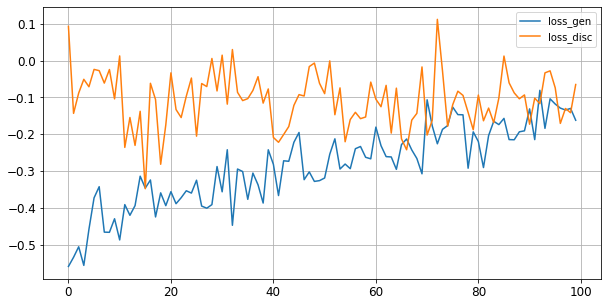

In [7]:
# plot loss
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'])
#ax.set_yscale('log')
ax.grid()
plt.show()

In [9]:
X_generated = wgan.predict(X_test_scaled, scaler)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


# Gaussian Process Regression

In [15]:
ypred_GPR = GPR_Model.train(X_train, y_train, X_test, n_features)

# Comparison

### Prediction Plots

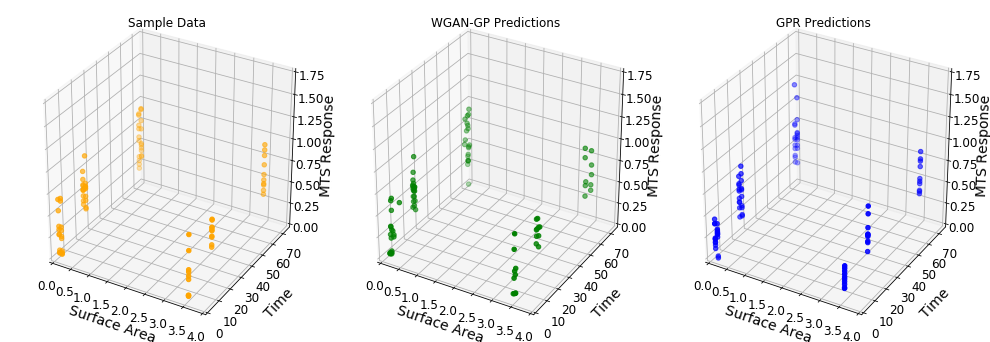

In [21]:
fig = plt.figure(figsize=(13, 4))

#---- First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(X_test[:,0], X_test[:,2], y_test, color='orange')
ax.set_title("Sample Data")
ax.set_xlabel("Surface Area")
ax.set_ylabel("\n Time")
ax.set_zlabel("MTS Response")
ax.set_xlim(0,4)
ax.set_ylim(-0,75)
ax.set_zlim(0,1.75)

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter(X_generated[:,0], X_generated[:,2], X_generated[:,3], color='green', label='Generated Data')
ax.set_title("WGAN-GP Predictions")
ax.set_xlabel("Surface Area")
ax.set_ylabel("\n Time")
ax.set_zlabel("MTS Response")
ax.set_xlim(0,4)
ax.set_ylim(-0,75)
ax.set_zlim(0,1.75)


ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter(X_test[:,0], X_test[:,2], ypred_GPR, c='b', label='Generated Data')
ax.set_title("GPR Predictions")
ax.set_xlabel("Surface Area")
ax.set_ylabel("\n Time")
ax.set_zlabel("MTS Response")
ax.set_xlim(0,4)
ax.set_ylim(-0,75)
ax.set_zlim(0,1.75)

plt.tight_layout(pad=-2, w_pad=0.8, h_pad=0)

### Probability Density Plots

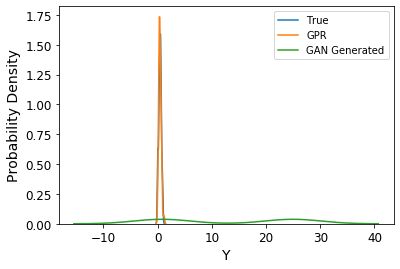

In [18]:
sns.distplot(y_train, hist=False, label='True')
sns.distplot(ypred_GPR, hist=False, label='GPR')
sns.distplot(X_generated[:,1], hist=False, label='GAN Generated')
plt.xlabel("Y")
plt.ylabel("Probability Density")
plt.legend(loc='best');